In [46]:
import zarr
import numpy as np
#Loading Required Libraries 
import anndata
import scipy as sp
import geopandas
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import pandas as pd
from libpysal.weights import Queen, Rook, KNN
from esda.moran import Moran
from splot.esda import plot_moran
import pyseq
from pyseq import image_analysis as ia
from dask.distributed import Client
import xarray as xr
import dask
%run /gpfs/commons/home/jsingh/util_pyseq.ipynb

In [55]:
im = ia.get_HiSeqImages(image_path = 'zarrs/m387ntga2.zarr')

ImageAnalysis::Opened m387ntga2 


/gpfs/commons/home/jsingh/PySeq2500/pyseq/image_analysis.py:955: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  im = xr.open_zarr(fn).to_array()


In [49]:
#random section
za = im.im
ar = za.sel(channel=610, cycle=1, obj_step = 8028)

In [50]:
za

<xarray.DataArray 'm387ntga2' (obj_step: 10, channel: 4, cycle: 4, row: 10467,
                               col: 10752)>
dask.array<getitem, shape=(10, 4, 4, 10467, 10752), dtype=int16, chunksize=(1, 1, 1, 10467, 1792), chunktype=numpy.ndarray>
Coordinates:
  * channel   (channel) int64 558 610 687 740
  * cycle     (cycle) int64 1 2 3 4
  * obj_step  (obj_step) int64 8028 8263 8498 8733 8968 ... 9438 9673 9908 10143
Dimensions without coordinates: row, col
Attributes:
    first_group:  0
    machine:      None
    scale:        1
    overlap:      256
    fixed_bg:     1

In [51]:
np.shape(ar)

(10467, 10752)

In [52]:
#loading ploygon regions 
gdf = geopandas.read_file('~/voronoi_regions/voronoi_regions.shp')

In [53]:
poly_list = gdf.geometry

In [54]:
np.shape(ar)

(10467, 10752)

In [19]:
#initial dask cluster
import dask

In [45]:
from dask.distributed import Client
client = Client(cluster)

NameError: name 'cluster' is not defined

In [35]:
#coord list
@dask.delayed
def create_list(x):
    cr_list = []
    for i in range(10467):
        for j in range(10752):
            cr_list.append([i,j])
    return cr_list


In [38]:
z = create_list(2)

In [39]:
j =z.compute()

2022-06-11 21:23:07,130 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.69 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:23:07,161 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.72 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:23:07,230 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

2022-06-11 21:23:19,290 - distributed.nanny - WARNING - Restarting worker
2022-06-11 21:23:45,091 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.67 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:23:45,102 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.67 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:23:45,196 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker

2022-06-11 21:23:56,780 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 7.55 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:23:56,920 - distributed.worker_memory - WARNING - Worker tcp://127.0.0.1:46074 (pid=240777) exceeded 95% memory budget. Restarting...
2022-06-11 21:23:57,296 - distributed.nanny - WARNING - Restarting worker
2022-06-11 21:24:23,349 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.81 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:24:23,390 - distributed.worker_memory - WARNING - Unmanage

2022-06-11 21:24:35,434 - distributed.nanny - WARNING - Restarting worker
2022-06-11 21:25:01,568 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.77 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:25:01,594 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.79 GiB -- Worker memory limit: 8.00 GiB
2022-06-11 21:25:01,706 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker

KeyboardInterrupt: 

In [31]:
j


[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 16],
 [0, 17],
 [0, 18],
 [0, 19],
 [0, 20],
 [0, 21],
 [0, 22],
 [0, 23],
 [0, 24],
 [0, 25],
 [0, 26],
 [0, 27],
 [0, 28],
 [0, 29],
 [0, 30],
 [0, 31],
 [0, 32],
 [0, 33],
 [0, 34],
 [0, 35],
 [0, 36],
 [0, 37],
 [0, 38],
 [0, 39],
 [0, 40],
 [0, 41],
 [0, 42],
 [0, 43],
 [0, 44],
 [0, 45],
 [0, 46],
 [0, 47],
 [0, 48],
 [0, 49],
 [0, 50],
 [0, 51],
 [0, 52],
 [0, 53],
 [0, 54],
 [0, 55],
 [0, 56],
 [0, 57],
 [0, 58],
 [0, 59],
 [0, 60],
 [0, 61],
 [0, 62],
 [0, 63],
 [0, 64],
 [0, 65],
 [0, 66],
 [0, 67],
 [0, 68],
 [0, 69],
 [0, 70],
 [0, 71],
 [0, 72],
 [0, 73],
 [0, 74],
 [0, 75],
 [0, 76],
 [0, 77],
 [0, 78],
 [0, 79],
 [0, 80],
 [0, 81],
 [0, 82],
 [0, 83],
 [0, 84],
 [0, 85],
 [0, 86],
 [0, 87],
 [0, 88],
 [0, 89],
 [0, 90],
 [0, 91],
 [0, 92],
 [0, 93],
 [0, 94],
 [0, 95],
 [0, 96],
 [0, 97],
 [0, 98],
 [0, 99],
 [0, 100],

In [24]:
z.visualize()

RuntimeError: No visualization engine detected, please install graphviz or ipycytoscape

In [ ]:
ar_cr = xr.DataArray(np.asarray(cr_list))

In [10]:
ar_cr

array([[0, 0],
       [0, 1],
       [0, 2]])

In [11]:
x = da.from_array(ar_cr, chunks = (10000,10000))

In [39]:
z

KeyError: 0

In [24]:
from shapely.geometry import Point
Point(x[2:5].values)

AttributeError: 'Array' object has no attribute 'values'

In [26]:
x[2:5].values

AttributeError: 'Array' object has no attribute 'values'

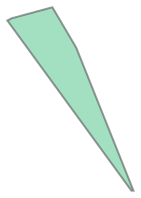

In [15]:
poly_list[0]

In [12]:
np.indices(ar[0,0])

TypeError: iteration over a 0-d array

In [48]:
plt.plot(ar)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd61aa28040> (for post_execute):


KeyboardInterrupt: 

In [6]:
import itertools

grid = list(itertools.product(range(10467), range(10752)))

In [31]:
ar_main = xr.DataArray(grid)

In [9]:
from pyseq import image_analysis as ia
im = ia.get_HiSeqImages(image_path = 'zarrs/m387ntga2.zarr',)

ImageAnalysis::Opened m387ntga2 


/gpfs/commons/home/jsingh/PySeq2500/pyseq/image_analysis.py:955: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  im = xr.open_zarr(fn).to_array()


In [10]:
za = im.im

In [11]:
from dask.distributed import Client
import xarray as xr
client = Client(n_workers=2, threads_per_worker=4, memory_limit='10GB')
client

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45071 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:45071/status,
Dashboard: http://127.0.0.1:45071/status,Workers: 2
Total threads: 8,Total memory: 18.63 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35096,Workers: 2
Dashboard: http://127.0.0.1:45071/status,Total threads: 8
Started: Just now,Total memory: 18.63 GiB
Comm: tcp://127.0.0.1:42724,Total threads: 4
Dashboard: http://127.0.0.1:44566/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:44103,


In [12]:
import dask.array

dask.array.ones((1000, 4), chunks=(2, 1)).compute() 

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [13]:
za

<xarray.DataArray 'm387ntga2' (obj_step: 10, channel: 4, cycle: 4, row: 10467,
                               col: 10752)>
dask.array<getitem, shape=(10, 4, 4, 10467, 10752), dtype=int16, chunksize=(1, 1, 1, 10467, 1792), chunktype=numpy.ndarray>
Coordinates:
  * channel   (channel) int64 558 610 687 740
  * cycle     (cycle) int64 1 2 3 4
  * obj_step  (obj_step) int64 8028 8263 8498 8733 8968 ... 9438 9673 9908 10143
Dimensions without coordinates: row, col
Attributes:
    first_group:  0
    machine:      None
    scale:        1
    overlap:      256
    fixed_bg:     1

In [17]:
import matplotlib.pyplot as plt
za[1,2,2].plot

In [18]:
za.sel(channel=558, cycle=1, obj_step = 8028)

<xarray.DataArray 'm387ntga2' (row: 10467, col: 10752)>
dask.array<getitem, shape=(10467, 10752), dtype=int16, chunksize=(10467, 1792), chunktype=numpy.ndarray>
Coordinates:
    channel   int64 558
    cycle     int64 1
    obj_step  int64 8028
Dimensions without coordinates: row, col
Attributes:
    first_group:  0
    machine:      None
    scale:        1
    overlap:      256
    fixed_bg:     1